c:\Users\pook0\.conda\envs\UM\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\pook0\.conda\envs\UM\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\pook0\.conda\envs\UM\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\pook0\.conda\envs\UM\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46108 (\N{HANGUL SYLLABLE DOEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


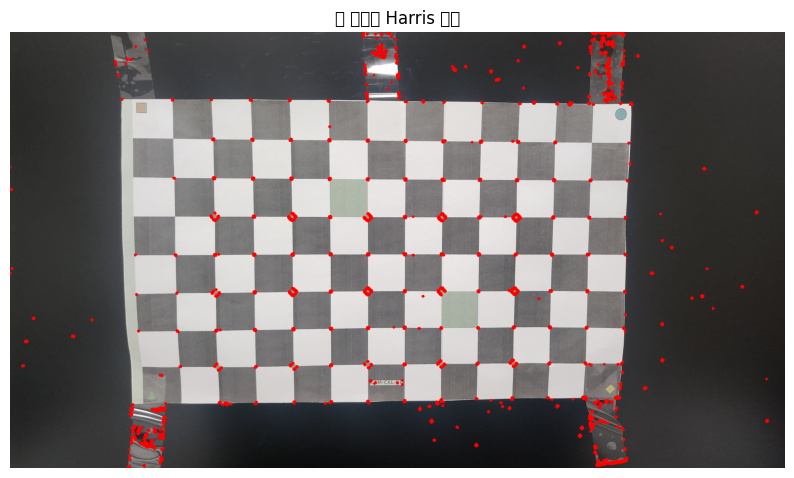

array([[1502,    0],
       [1503,    0],
       [1504,    0],
       ...,
       [ 308, 1125],
       [ 309, 1125],
       [ 310, 1125]], dtype=int64)

In [3]:
def detect_harris_corners_enhanced(img_path, resize_ratio=0.5, threshold_ratio=0.005):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (0, 0), fx=resize_ratio, fy=resize_ratio)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 히스토그램 평활화로 대비 증가
    gray_eq = cv2.equalizeHist(gray)

    # Harris 코너
    gray_f = np.float32(gray_eq)
    dst = cv2.cornerHarris(gray_f, blockSize=3, ksize=5, k=0.04)
    dst = cv2.dilate(dst, None)

    # 임계값 낮게
    threshold = threshold_ratio * dst.max()
    corners = np.argwhere(dst > threshold)
    corners = np.fliplr(corners)

    # 시각화
    vis = img.copy()
    for x, y in corners:
        cv2.circle(vis, (x, y), 2, (0, 0, 255), -1)

    plt.figure(figsize=(10, 8))
    plt.imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB))
    plt.title("✨ 개선된 Harris 코너")
    plt.axis('off')
    plt.show()

    return corners


detect_harris_corners_enhanced("./camera_image/KakaoTalk_20250602_214755364.jpg")
